# 강남 3구는 안전한가?

### 콤마(,)로 천단위가 구분되어 있고, 한글 엔코딩은 euc-kr
### EUC-KR, CP949 방식은 완성형 인코딩 방식이고, 한글을 2바이트로 사용
### UTF-8의 경우 조합형, 한글을 3바이트로 사용


In [1]:
import numpy as np
import pandas as pd

In [2]:
crime_anal_police = pd.read_csv('../../data/02. crime_in_Seoul.csv',
                               thousands=',',
                               encoding='euc-kr')
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


# Google maps를 사용해서 경찰서의 위치(위도, 경도) 정보 받아오기

In [3]:
# ! pip install googlemaps

In [4]:
import googlemaps

In [58]:
# # gmaps_key = "" # 자신의 API key 사용
# gmaps = googlemaps.Client(key=gmaps_key)

In [6]:
gmaps.geocode('서울중부경찰서', language='ko')

[{'address_components': [{'long_name': '27',
    'short_name': '27',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 수표로 27',
  'geometry': {'location': {'lat': 37.56361709999999, 'lng': 126.9896517},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5649660802915,
     'lng': 126.9910006802915},
    'southwest': {'lat': 37.5622681197085, 'lng': 126.9883027197085}}},
  'partial_match': True,
  'place_id': 'ChIJc-9q5uSifDURLhQmr5wkXmc',
 

In [7]:
gmaps.geocode('서울중부경찰서', language='ko')
tmp = gmaps.geocode('서울중부경찰서', language='ko')
print(tmp[0].get("formatted_address"))
print(tmp[0].get("geometry"))

tmp_loc = tmp[0].get('geometry')
print("")
print("--------------------------------------")
print("위도 =>", tmp_loc['location']['lat'])
print("경도 =>", tmp_loc['location']['lng'])

대한민국 서울특별시 중구 수표로 27
{'location': {'lat': 37.56361709999999, 'lng': 126.9896517}, 'location_type': 'ROOFTOP', 'viewport': {'northeast': {'lat': 37.5649660802915, 'lng': 126.9910006802915}, 'southwest': {'lat': 37.5622681197085, 'lng': 126.9883027197085}}}

--------------------------------------
위도 => 37.56361709999999
경도 => 126.9896517


In [8]:
a = gmaps.geocode('서울중부경찰서', language='ko')
b = pd.DataFrame(a)
b

,address_components,formatted_address,geometry,partial_match,place_id,plus_code,types
0,"[{'long_name': '27', 'short_name': '27', 'type...",대한민국 서울특별시 중구 수표로 27,"{'location': {'lat': 37.56361709999999, 'lng':...",True,ChIJc-9q5uSifDURLhQmr5wkXmc,"{'compound_code': 'HX7Q+CV 대한민국 서울특별시', 'globa...","[establishment, point_of_interest]"


In [9]:
name = crime_anal_police['관서명'].head(3)
name

0     중부서
1     종로서
2    남대문서
Name: 관서명, dtype: object

In [10]:
station_name = []

for name in crime_anal_police['관서명']:
#     print(name)
    station_name.append('서울'+ str(name[:-1]) + '경찰서')
    
station_name[:5]

['서울중부경찰서', '서울종로경찰서', '서울남대문경찰서', '서울서대문경찰서', '서울혜화경찰서']

In [11]:
station_address = []
station_lat = []
station_lng = []
for name in station_name:
    tmp = gmaps.geocode(name, language='ko')
    station_address.append(tmp[0].get("formatted_address"))
    tmp_loc = tmp[0].get("geometry")
    station_lat.append(tmp_loc['location']['lat'])  # 위도 저장
    station_lng.append(tmp_loc['location']['lng'])  # 경도 저장
    print(name + '-->' + tmp[0].get("formatted_address"))

서울중부경찰서-->대한민국 서울특별시 중구 수표로 27
서울종로경찰서-->대한민국 서울특별시 종로구 인사동5길 41
서울남대문경찰서-->대한민국 서울특별시 중구 한강대로 410
서울서대문경찰서-->대한민국 서울특별시 서대문구 통일로 113
서울혜화경찰서-->대한민국 서울특별시 종로구 창경궁로 112-16
서울용산경찰서-->대한민국 서울특별시 용산구 백범로 329
서울성북경찰서-->대한민국 서울특별시 성북구 삼선동 보문로 170
서울동대문경찰서-->대한민국 서울특별시 동대문구 약령시로21길 29
서울마포경찰서-->대한민국 서울특별시 마포구 마포대로 183
서울영등포경찰서-->대한민국 서울특별시 영등포구 국회대로 608
서울성동경찰서-->대한민국 서울특별시 성동구 행당동 왕십리광장로 9
서울동작경찰서-->대한민국 서울특별시 동작구 노량진로 148
서울광진경찰서-->대한민국 서울특별시 광진구 구의동 자양로 167
서울서부경찰서-->대한민국 서울특별시 은평구 진흥로 58
서울강북경찰서-->대한민국 서울특별시 강북구 오패산로 406
서울금천경찰서-->대한민국 서울특별시 금천구 시흥대로73길 50
서울중랑경찰서-->대한민국 서울특별시 중랑구 묵제2동 249-2
서울강남경찰서-->대한민국 서울특별시 강남구 테헤란로114길 11
서울관악경찰서-->대한민국 서울특별시 관악구 관악로5길 33
서울강서경찰서-->대한민국 서울특별시 강서구 화곡로 308
서울강동경찰서-->대한민국 서울특별시 강동구 성내로 57
서울종암경찰서-->대한민국 서울특별시 성북구 월곡제2동 94-5
서울구로경찰서-->대한민국 서울특별시 구로구 새말로 97 신도림테크노마트 5층
서울서초경찰서-->대한민국 서울특별시 서초구 서초3동 반포대로 179
서울양천경찰서-->대한민국 서울특별시 양천구 목동동로 99
서울송파경찰서-->대한민국 서울특별시 송파구 중대로 221
서울노원경찰서-->대한민국 서울특별시 노원구 노원로 283
서울방배경찰서-->대한민국 서울특별시 서초구 동작대로 204
서울은평경찰서-->대한민국 서

In [12]:
station_lat[:5]

[37.56361709999999, 37.571824, 37.5547584, 37.5647439, 37.5719679]

In [13]:
name = '대한민국 서울특별시 강남구 개포로 617'
tmp = name.split()
print(tmp)
tmp_gu = [gu for gu in tmp if gu[-1] == '구']
print(tmp_gu)

['대한민국', '서울특별시', '강남구', '개포로', '617']
['강남구']


In [14]:
gu_name = []

for name in station_address:
    tmp = name.split()
    tmp_gu = [gu for gu in tmp if gu[-1] == '구'][0]   # 끝자리가 '구'이면 리스트 추가
    gu_name.append(tmp_gu)
    
crime_anal_police['구별'] = gu_name
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [15]:
crime_anal_police[crime_anal_police['관서명'] == '금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,금천구


In [16]:
crime_anal_police.loc[crime_anal_police['관서명'] == '금천서',
                          ['구별']] = '금천구'

crime_anal_police[crime_anal_police['관서명'] == '금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,금천구


In [17]:
# csv 파일 저장
crime_anal_police.to_csv(
            '../../data/02. crime_in_Seoul_include_gu_name11.csv',
            sep = ',', encoding='utf-8')

# 범죄 데이터 구별로 정리하기

In [18]:
crime_anal_raw = pd.read_csv(
    '../../data/02. crime_in_Seoul_include_gu_name11.csv', encoding='utf-8'
)
crime_anal_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [19]:
crime_anal_raw[crime_anal_raw['구별'] == '중구']

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구


In [20]:
crime_anal_raw = pd.read_csv(
    '../../data/02. crime_in_Seoul_include_gu_name11.csv', encoding='utf-8',
    index_col = 0
)
crime_anal = pd.pivot_table(crime_anal_raw, index='구별', aggfunc=np.sum)
crime_anal.head()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_5900\1983786655.py:5: FutureWarning: The operation <function sum at 0x0000015FD06EA290> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  crime_anal = pd.pivot_table(crime_anal_raw, index='구별', aggfunc=np.sum)


,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298


In [21]:
crime_anal['강간검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생']*100
crime_anal['강도검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생']*100
crime_anal['살인검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생']*100
crime_anal['절도검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생']*100
crime_anal['폭력검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생']*100

del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

In [22]:
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [23]:
crime_anal.columns

Index(['강간 발생', '강도 발생', '살인 발생', '절도 발생', '폭력 발생', '강간검거율', '강도검거율', '살인검거율',
       '절도검거율', '폭력검거율'],
      dtype='object')

In [24]:
# **검거율 중 100이 넘어가는 값을 100으로 처리
con_list = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

for column in con_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100
    
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


In [25]:
crime_anal.rename(columns= {'강간 발생': '강간',
                            '강도 발생': '강도',
                            '살인 발생': '살인',
                            '절도 발생': '절도',
                            '폭력 발생': '폭력'}, inplace =True)
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


In [26]:
from sklearn import preprocessing

col = ['강간', '강도', '살인', '절도', '폭력']

# 0과 1 사이로 정규화

x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled, columns = col, index = crime_anal.index)

col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


In [27]:
result_CCTV = pd.read_csv('../../data/01. CCTV_result.csv', encoding='UTF-8',
                         index_col = '구별')
crime_anal_norm[['인구수', 'CCTV']] = result_CCTV[['인구수', '소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496


In [28]:
col = ['강간', '강도', '살인', '절도', '폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis = 1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342


In [29]:
col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col2], axis = 1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,368.622261


# Visualization using seaborn

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False   # - 기호 깨지는 것 방지
# f_path = "/Library/Fonts/AppleGothic.ttf"   -> MAC
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

import warnings
warnings.filterwarnings(action='ignore')

In [31]:
palette = sns.color_palette('coolwarm', 10)

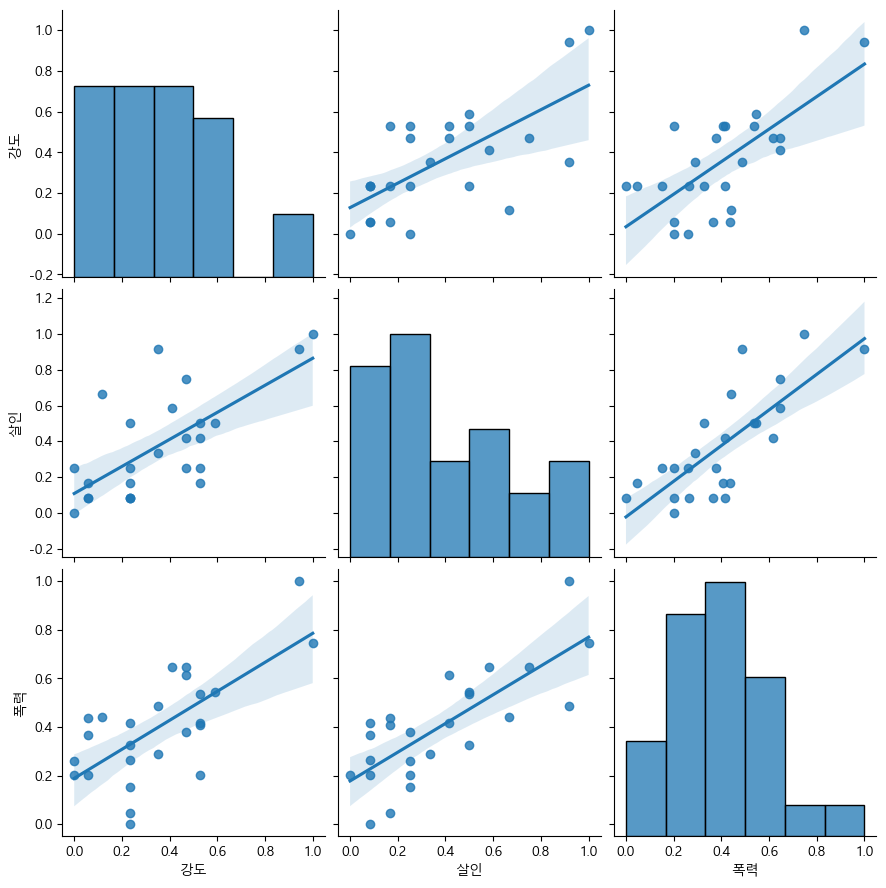

In [32]:
sns.pairplot(crime_anal_norm, vars=['강도', '살인', '폭력'],
             kind='reg', size=3, palette=palette)
plt.show()

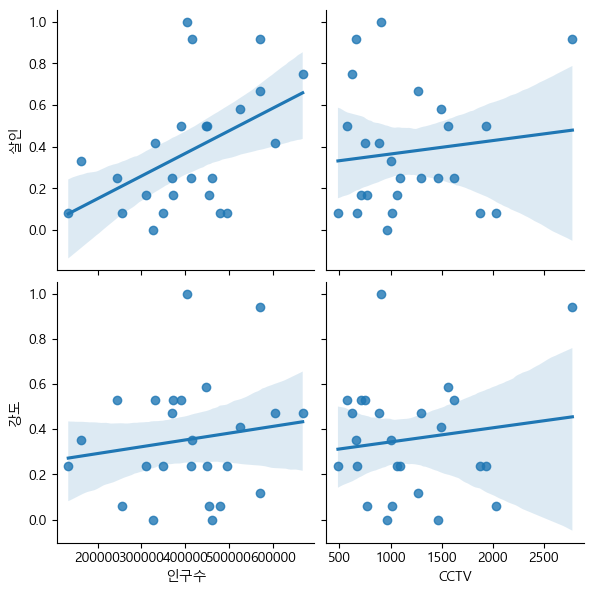

In [33]:
sns.pairplot(crime_anal_norm, x_vars=['인구수', 'CCTV'],
             y_vars=['살인','강도'],
             kind='reg', size=3, palette=palette)
plt.show()

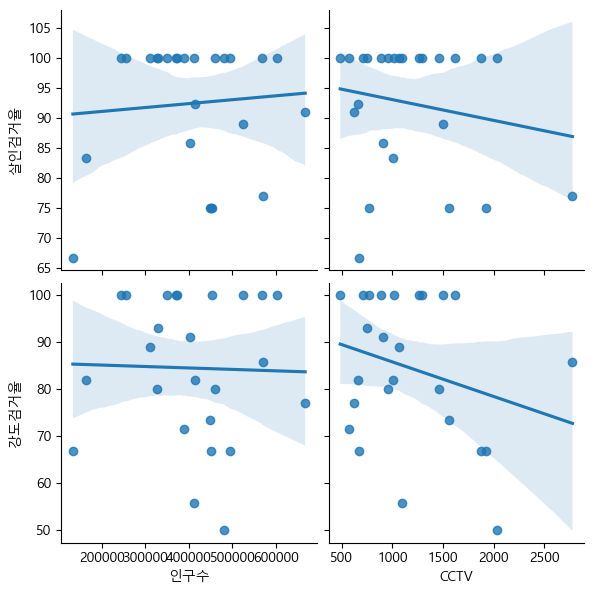

In [34]:
sns.pairplot(crime_anal_norm, x_vars=['인구수', 'CCTV'],
             y_vars=['살인검거율','강도검거율'],
             kind='reg', size=3, palette=palette)
plt.show()

In [35]:
tmp_max = crime_anal_norm['검거'].max()
print(tmp_max)
crime_anal_norm['검거'] = crime_anal_norm['검거'] / tmp_max * 100
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head() 

432.593167122272


,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.666924,97.997139
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,603772.0,884,2.333944,96.572809
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.204979,96.375820
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.633921,95.444250


In [36]:
crime_anal_norm['검거'].max()

100.0

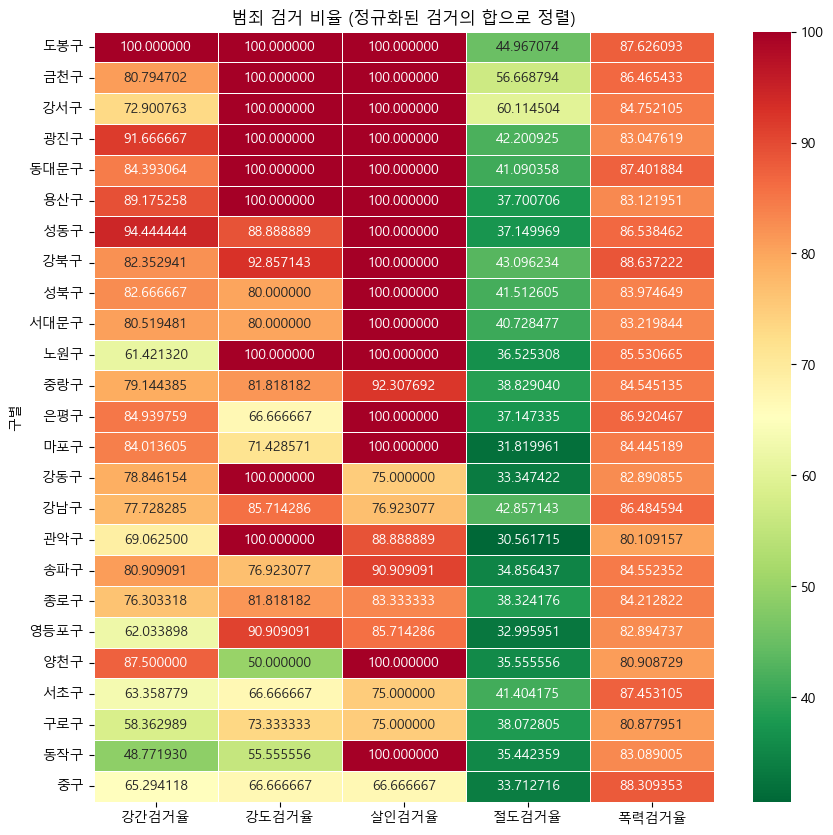

In [37]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending = False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f',
           linewidths=.5, cmap='RdYlGn_r')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

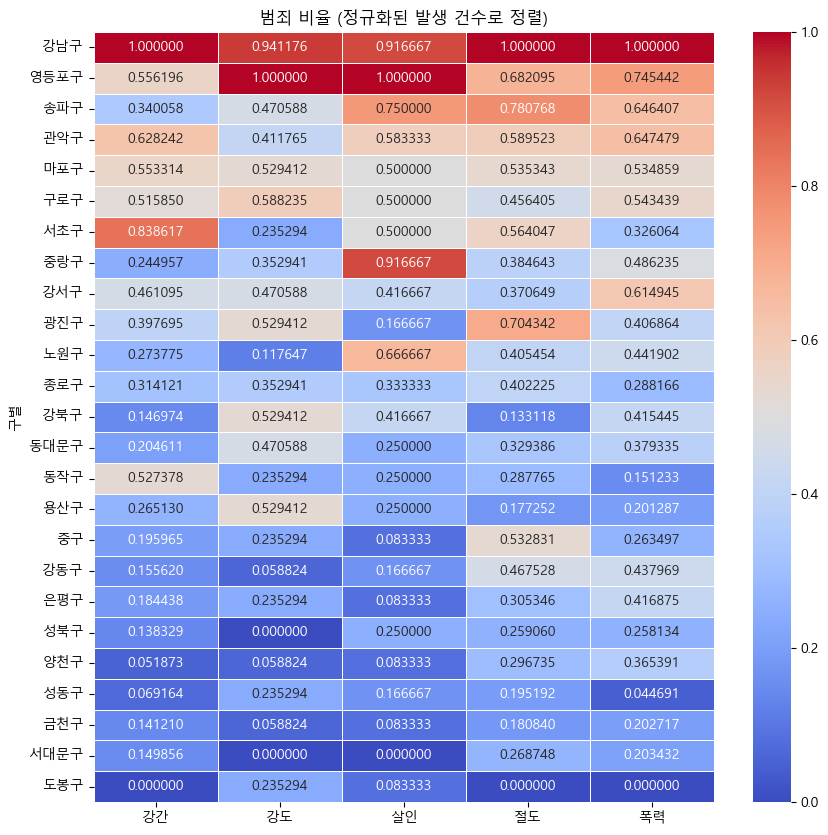

In [38]:
target_col = ['강간', '강도', '살인', '절도', '폭력']
crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending = False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f',
           linewidths=.5, cmap='coolwarm')
plt.title('범죄 비율 (정규화된 발생 건수로 정렬)')
plt.show()

In [39]:
crime_anal_norm.to_csv('../../data/02. crime_in_Seoul_final.csv', sep=',',
                      encoding='utf-8')

# 범죄율에 대한 지도 시각화

In [40]:
import folium
import pandas as pd

In [41]:
# ! pip install folium

In [42]:
map_osm = folium.Map(location=[37.5502, 126.982]) # 위도, 경도
map_osm

In [43]:
# 확대 비율
ss = folium.Map(location=[37.5502, 126.982],
                tiles='Stamen Toner', zoom_start= 10) # 위도, 경도
ss
#OpenStreetMap, Stamen Terrain, Stamen Toner, Mapbox Bright,
#and Mapbox Control Room

In [44]:
import json
geo_path = '../../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
# geo_str

In [45]:
map = folium.Map(location=[37.552, 126.982], zoom_start=11,
                tiles = 'Stamen Toner')
map.choropleth(geo_data=geo_str,
              data=crime_anal_norm['살인'],
               columns = [crime_anal.index, crime_anal_norm['살인']],
               fill_color = 'YlGn',
               key_on = 'feature.id')
map

In [46]:
map = folium.Map(location=[37.552, 126.982], zoom_start=11,
                tiles = 'Stamen Toner')
map.choropleth(geo_data=geo_str,
              data=crime_anal_norm['강간'],
               columns = [crime_anal.index, crime_anal_norm['강간']],
               fill_color = 'YlOrRd',
               key_on = 'feature.id')
map

In [47]:
map = folium.Map(location=[37.552, 126.982], zoom_start=11,
                tiles = 'Stamen Toner')
map.choropleth(geo_data=geo_str,
              data=crime_anal_norm['범죄'],
               columns = [crime_anal.index, crime_anal_norm['범죄']],
               fill_color = 'PuBuGn',
               key_on = 'feature.id')
map

In [48]:
tmp_criminal = crime_anal_norm['살인'] / crime_anal_norm['인구수'] * 1000000
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                tiles = 'Stamen Toner')
map.choropleth(geo_data=geo_str,
              data=tmp_criminal,
               columns = [crime_anal.index, tmp_criminal],
               fill_color = 'BuPu',
               key_on = 'feature.id')
map

In [49]:
map = folium.Map(location=[37.552, 126.982], zoom_start=11,
                tiles = 'Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=crime_anal_norm['검거'],
               columns = [crime_anal.index, crime_anal_norm['검거']],
               fill_color = 'GnBu',
               key_on = 'feature.id')
map

# map.save('../../data/Seoul.html')

# 경찰서별 검거현황과 구별 범죄 발생 현황 표현

In [50]:
crime_anal_raw['lat'] = station_lat
crime_anal_raw['lng'] = station_lng

col = ['살인 검거', '강도 검거', '강간 검거','절도 검거','폭력 검거']
tmp = crime_anal_raw[col] /crime_anal_raw[col].max()

crime_anal_raw['검거'] = np.sum(tmp, axis=1)
crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng,검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563617,126.989652,1.275416
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.571824,126.984153,1.523847
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498,0.907372
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564744,126.966770,1.978299
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571968,126.998957,1.198382


In [51]:
map = folium.Map(location=[37.552, 126.982], zoom_start=11)

for n in crime_anal_raw.index:
#     print(n)
    folium.Marker([crime_anal_raw['lat'][n],
                  crime_anal_raw['lng'][n]]).add_to(map)
map

In [52]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]],
                       radius = crime_anal_raw['검거'][n]*10,
                       color='#3186cc', fill_color='#3186cc', fill=True).add_to(map)
map

In [53]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data=geo_str,
              data=crime_anal_norm['범죄'],
               columns = [crime_anal.index, crime_anal_norm['범죄']],
               fill_color = 'RdYlGn_r',
               key_on = 'feature.id')

for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]],
                       radius = crime_anal_raw['검거'][n]*10,
                       color='#3186cc', fill_color='#3186cc', fill=True).add_to(map)
map

# 문제

In [55]:
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
mc = MarkerCluster().add_to(map)
icon_url = 'http://newsimg.hankookilbo.com/2017/04/28/201704281457620365_1.jpg'

lat_float = np.array(crime_anal_raw['lat']).astype('float')
lng_float = np.array(crime_anal_raw['lng']).astype('float')


map.choropleth(geo_data=geo_str,
              data=crime_anal_norm['범죄'],
               columns = [crime_anal.index, crime_anal_norm['범죄']],
               fill_color = 'GnBu',
               key_on = 'feature.id')

for n in crime_anal_raw.index:
    iframe = '경찰서 이름: '+ crime_anal_raw['관서명'][n]+"<br> 폭력 발생 수: "+ str(crime_anal_raw['폭력 발생'][n])
    popup = folium.Popup(iframe, min_width=300, max_width=300)
    
    mc.add_child(folium.Marker([crime_anal_raw['lat'][n],
                                crime_anal_raw['lng'][n]],
                                popup=popup,
                                icon=folium.CustomIcon(icon_url, icon_size=(50, 50))).add_to(map))
    HeatMap(
        data=zip(lat_float, lng_float), 
        radius=20,
        min_opacity=0.1,
        max_val=5,
        blur=15,
        max_zoom=5,color='red').add_to(map)
    
map.save('../../data/Seoul.html')
map